<h2 style="text-align: center;">Bezier Curves</h2>
<h3 style="text-align: center;">Ross Beveridge, December 10, 2017</h3>
<p style="text-align: left;">This notebook sets up the linear algebra to map from the geometry matrix specifying a Bezier curve through to the parametric, cubic, form of the x, y and z coordinates of the curve.  </p>

In [6]:
var('t')
var('x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4')
TV = Matrix(SR, 4,1, ((t**3,t**2,t,1)))
MB = Matrix(ZZ, 4,4, ((-1,3,-3,1),(3,-6,3,0),(-3,3,0,0),(1,0,0,0)))
GB = Matrix(SR, 4,3, ((x1,y1,z1),(x2,y2,z2),(x3,y3,z3),(x4,y4,z4))).transpose()
QT = GB * MB * TV
pretty_print(GB, MB, TV)
pretty_print(LatexExpr("x(t) = "), QT[0,0])
pretty_print(LatexExpr("y(t) = "), QT[1,0])
pretty_print(LatexExpr("z(t) = "), QT[2,0])

[x1 x2 x3 x4]
[y1 y2 y3 y4]
[z1 z2 z3 z4] [-1  3 -3  1]
[ 3 -6  3  0]
[-3  3  0  0]
[ 1  0  0  0] [t^3]
[t^2]
[  t]
[  1]

x(t) =  -t^3*(x1 - 3*x2 + 3*x3 - x4) + 3*t^2*(x1 - 2*x2 + x3) - 3*t*(x1 - x2) + x1

y(t) =  -t^3*(y1 - 3*y2 + 3*y3 - y4) + 3*t^2*(y1 - 2*y2 + y3) - 3*t*(y1 - y2) + y1

z(t) =  -t^3*(z1 - 3*z2 + 3*z3 - z4) + 3*t^2*(z1 - 2*z2 + z3) - 3*t*(z1 - z2) + z1

<h3 style="text-align: center;">Example 1: A relatively simple curve</h3>
<p>Here is the same basic workup, but now using actual values for the geometry matrix.  As it turns out this curve has no inflection points.</p>

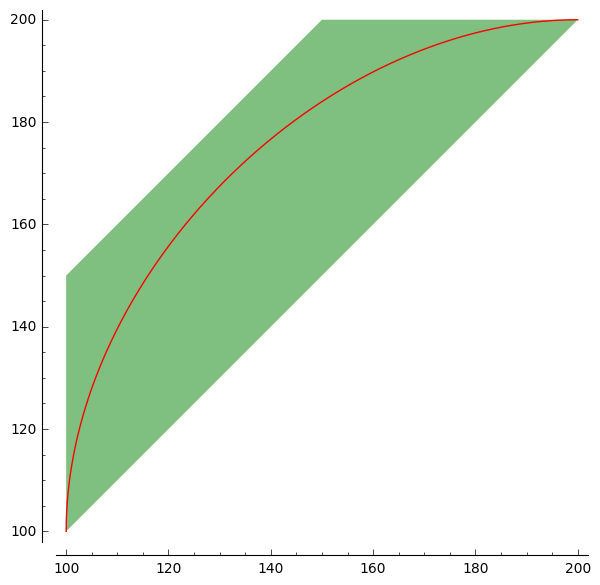

In [7]:
P1 = (100,100,0)
P2 = (100,150,0)
P3 = (150,200,0)
P4 = (200,200,0)
GB = Matrix(SR, 4,3, (P1,P2,P3,P4)).transpose()
QT = GB * MB * TV
gpoly = polygon([[GB[0,i],GB[1,i]] for i in range(4)],rgbcolor=(0.0,0.5,0.0),alpha=0.5)
gplot = parametric_plot((QT[0,0],QT[1,0]),(t, 0.0,1.0),color=(1.0,0.0,0.0))
fig  = gpoly + gplot
fig.show()

<h3 style="text-align: center;">Example 2: A Line is a Curve</h3>
<p>This example is a bit more subtle, and makes the point that a straight line segment is entirely possible using the geometry specification for a Bezier Curve</p>

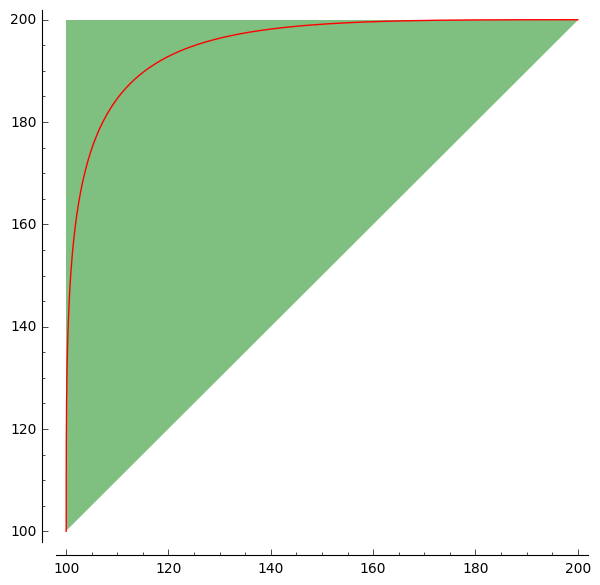

In [8]:
P1 = (100,100,0)
P2 = (100,200,0)
P3 = (100,200,0)
P4 = (200,200,0)
GB = Matrix(SR, 4,3, (P1,P2,P3,P4)).transpose()
QT = GB * MB * TV
gpoly = polygon([[GB[0,i],GB[1,i]] for i in range(4)],rgbcolor=(0.0,0.5,0.0),alpha=0.5)
gplot = parametric_plot((QT[0,0],QT[1,0]),(t, 0.0,1.0),color=(1.0,0.0,0.0))
fig  = gpoly + gplot
fig.show()

<h3 style="text-align: center;">Example 3: Curve Crossing Itself</h3>
<p>It is entirely possible to force a Bezier Curve to intersect itself. In this next example, pay attention to the statement that the curve must remain inside the convex hull of the four points.  It is not true, as you can see, that the curve remains inside a polygon with vertices enumerated in order. </p>

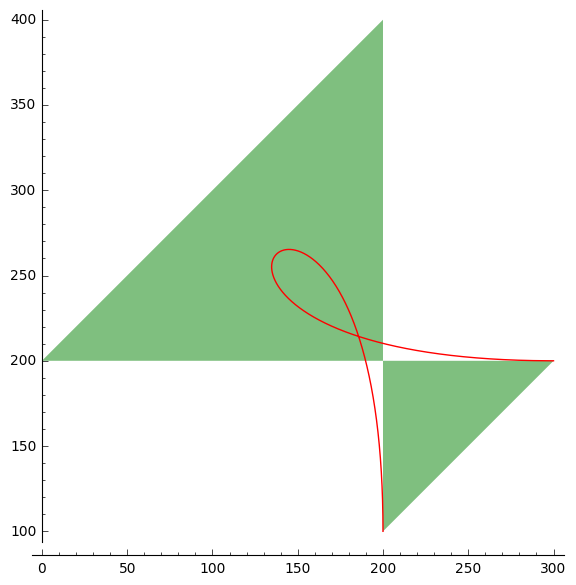

In [9]:
P1 = ( 200,100,0)
P2 = ( 200,400,0)
P3 = (   0,200,0)
P4 = ( 300,200,0)
GB = Matrix(SR, 4,3, (P1,P2,P3,P4)).transpose()
QT = GB * MB * TV
gpoly = polygon([[GB[0,i],GB[1,i]] for i in range(4)],rgbcolor=(0.0,0.5,0.0),alpha=0.5)
gplot = parametric_plot((QT[0,0],QT[1,0]),(t, 0.0,1.0),color=(1.0,0.0,0.0))
fig  = gpoly + gplot
fig.show()

<div id="cell_text_4" class="text_cell">
<h3 style="text-align: center;">Example 4: Curves in Space</h3>
<p>As our development is for a 3D curve, here is a truly 3D curve.  Notice that this curve does not lie in a plane.  </p>
</div>
<div id="cell_outer_10" class="cell_visible"> </div>

In [10]:
P1 = (  0,   0,   0)
P2 = (100,   0,   0)
P3 = (  0, 100, 100)
P4 = (  0,   0, 100)
GB = Matrix(SR, 4,3, (P1,P2,P3,P4)).transpose()
QT = GB * MB * TV
#gpoly = polygon([[GB[0,i],GB[1,i],GB[2,i]] for i in range(4)],rgbcolor=(0.0,0.5,0.0),alpha=0.5)
gplot = parametric_plot3d((QT[0,0],QT[1,0],QT[2,0]),(t, 0.0,1.0),color=(0.2,0.2,0.6),thickness=8)
fig  = gplot
fig += point3d(P1,color=(1.0,0.0,0.0),size=16)
fig += point3d(P2,color=(0.0,1.0,0.0),size=16)
fig += point3d(P3,color=(0.0,0.0,1.0),size=16)
fig += point3d(P4,color=(0.8,0.8,0.0),size=16)
fig.show()

Graphics3d Object